# 6.3 Geographic Visualization

This Script Contains the following:

1. Import data and libraries
2. Data Wrangling
3. Data Cleaning
4. Plotting a Choropleth

1. Import Data and Libraries

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for the U.S. 

country_geo = r'/Users/crystalosuna/Documents/Gun Violence Analysis/Data/us-states.json'

In [4]:
# Look at the JSON file contents:

f = open(r'/Users/crystalosuna/Documents/Gun Violence Analysis/Data/us-states.json')

# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [12]:
path = r'/Users/crystalosuna/Documents/Gun Violence Analysis'

In [13]:
#Import gun violence data

df= pd.read_csv (os.path.join(path, 'Data', 'gun-violence-data-clean2.csv'), index_col = False)

In [14]:
df.head()

,0,incident_id,date,state,city_or_county,Killed,Injured,congressional_district,gun_type,incident_characteristics,...,participant_gender,participant_status,participant_type,state_house_district,state_senate_district,latitude,longitude,year,month,loss
0,0,461105,1/1/13,Pennsylvania,Mckeesport,0,4,14,0::Unkown,Shot - Wounded/Injured||Mass Shooting (4+ vict...,...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,Unkown,Unkown,40.3467,-79.8559,2013,1,4
1,1,460726,1/1/13,California,Hawthorne,1,3,43,0::Unkown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62,35,33.9090,-118.3330,2013,1,4
2,2,478855,1/1/13,Ohio,Lorain,1,3,9,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56,13,41.4455,-82.1377,2013,1,4
3,3,478925,1/5/13,Colorado,Aurora,4,0,6,0::Unkown,"Shot - Dead (murder, accidental, suicide)||Off...",...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40,28,39.6518,-104.8020,2013,1,4
4,4,478959,1/7/13,North Carolina,Greensboro,2,2,6,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62,27,36.1140,-79.9569,2013,1,4


In [15]:
df.shape

(239677, 25)

2. Data Wrangling

In [16]:
df.columns

Index(['0', 'incident_id', 'date', 'state', 'city_or_county', 'Killed',
       'Injured', 'congressional_district', 'gun_type',
       'incident_characteristics', 'Gang Related', 'Mass shooting?',
       'number_guns_involved', 'participant_age', 'participant_age_group',
       'participant_gender', 'participant_status', 'participant_type',
       'state_house_district', 'state_senate_district', 'latitude',
       'longitude', 'year', 'month', 'loss'],
      dtype='object')

In [17]:
df.rename(columns = {'state': 'st_nm'}, inplace = True)

In [20]:
# Select only the necessary columns and put them in a list called columns
columns = ['month','st_nm','Killed', 'Injured', 'loss','Gang Related','Mass shooting?']

In [21]:
df_new = df[columns]

In [22]:
df_new.head()

,month,st_nm,Killed,Injured,loss,Gang Related,Mass shooting?
0,1,Pennsylvania,0,4,4,Not Gang Related,Mass Shooting
1,1,California,1,3,4,Gang Related,Mass Shooting
2,1,Ohio,1,3,4,Not Gang Related,Not a Mass Shooting
3,1,Colorado,4,0,4,Not Gang Related,Not a Mass Shooting
4,1,North Carolina,2,2,4,Not Gang Related,Not a Mass Shooting


Consistency Checks

In [23]:
#check for missing values 
df_new.isnull().sum()

month             0
st_nm             0
Killed            0
Injured           0
loss              0
Gang Related      0
Mass shooting?    0
dtype: int64

In [24]:
#check for duplicated
dups = df_new.duplicated()

In [25]:
dups.shape

(239677,)

<Axes: xlabel='loss', ylabel='Count'>

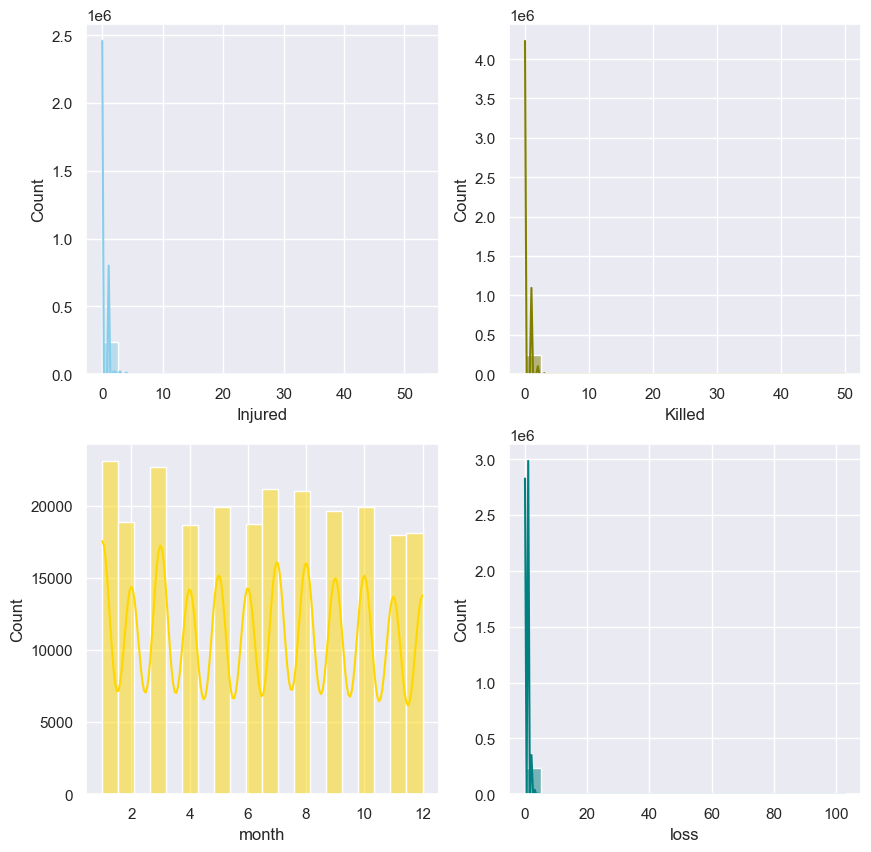

In [31]:
# Extreme values checks
# set a grey background (use sns.set_theme() 
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(df_new['Injured'], bins=20, kde = True, color="skyblue", ax=axs[0, 0])
sns.histplot(df_new['Killed'], bins=20, kde = True, color="olive", ax=axs[0, 1])
sns.histplot(df_new['month'], bins=20, kde = True, color="gold", ax=axs[1, 0])
sns.histplot(df_new['loss'], bins=20, kde = True, color="teal", ax=axs[1, 1])


# Plotting a Choropleth

States and Total Killed or Injured = 'loss' due to gun violence

In [32]:
# Create a data frame with States and loss
data_to_plot1 = df_new[['st_nm','loss']]
data_to_plot1.head()

,st_nm,loss
0,Pennsylvania,4
1,California,4
2,Ohio,4
3,Colorado,4
4,North Carolina,4


In [34]:
# Setup a folium map at a high-level zoom
total_loss_map = folium.Map(location = [20,78], zoom_start = 2.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = data, 
    data = data_to_plot1,
    columns = ["st_nm","loss"],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Total Loss").add_to(total_loss_map)
folium.LayerControl().add_to(total_loss_map)

total_loss_map

In [35]:
total_loss_map.save('plot_loss_data.html')

-This analysis can answer the question of which states are being affected the most by gun violence incidents. The answer would clearly be North Carolina with the highest number of killed or injured by gun related incidents. 

-Now I can see that North Carolina has had the highest number of killed or injured by these incendents but now I am wondering if there is a way I can see if this is because they were mass shootings or there were a lot of incidents that led to the high number of total loss.